# simple linear regression 

#### 生成数据集

In [2]:
import torch
import numpy as np

In [3]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0,1,(num_examples,num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

#### 读取数据
使用Pytorch提供的包


In [9]:
import torch.utils.data as Data
batch_size = 5
# 将特征与目标变量组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
# 生成一个迭代器，每次迭代返回一批量数据
data_iter = Data.DataLoader(dataset, batch_size,shuffle=True)

In [11]:
# test
for x, y in data_iter:
    print(x, y)
    break

tensor([[-0.1343, -0.7588],
        [ 0.9450, -0.9041],
        [ 0.4244,  0.0981],
        [ 0.2486, -1.6493],
        [ 0.7992,  0.2572]]) tensor([ 6.5128,  9.1495,  4.7325, 10.3072,  4.9362])


#### 定义模型
利用torch.nn构建模型

In [13]:
import torch.nn as nn
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super().__init__()
        self.linear = nn.Linear(n_feature, 1)
    def forward(self, x):
        y = self.linear(x)
        return y
    
net = LinearNet(num_inputs)
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


利用nn.Sequential搭建模型

In [15]:
# 1
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
)

# 2
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# ...

# 3
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
            ('linear', nn.Linear(num_inputs, 1))
                                ]))
print(net)

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


**查看模型的可学习参数**

In [16]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.5484,  0.0521]], requires_grad=True)
Parameter containing:
tensor([-0.3587], requires_grad=True)


torch.nn仅支持batch的样本输入，而不支持单个样本输入，单个样本需要增加维度

**初始化模型参数**

In [18]:
from torch.nn import init
init.normal_(net[0].weight, mean=0,std=0.01)
init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

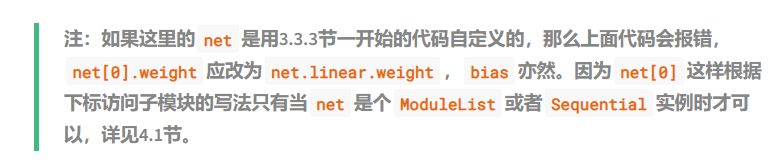

#### 定义损失函数

In [19]:
loss = nn.MSELoss()

In [20]:
#### 定义优化算法
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


#### 训练模型

In [22]:
num_epochs = 3
for epoch in range(1, num_epochs+1):
    for x, y in data_iter:
        output = net(x)
        l = loss(output, y.view(-1,1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.000069
epoch 2, loss: 0.000038
epoch 3, loss: 0.000061
